# EDA - previous

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 0)

import missingno as msno
import seaborn as sns
from tqdm import tqdm
from IPython.display import display

sns.set_style('darkgrid')
tqdm.pandas()

In [68]:
train = pd.read_feather('../input/application_train.ftr')
test = pd.read_feather('../input/application_test.ftr')
prev = pd.read_feather('../input/previous_application.ftr')

In [69]:
prev.replace({'Y': 1, 'N': 0, 'M': 0, 'F': 1, 'XNA': np.nan, 'XAP': np.nan}, inplace=True)
prev.loc[:, prev.columns.str.startswith('DAYS_')] = prev.filter(regex='DAYS_').replace({365243: np.nan})

In [70]:
display(prev.head())

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,1,1,0.0,0.182832,0.867336,NaN,Approved,-73,Cash through the bank,NaN,None,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,NaN,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,1,1,NaN,NaN,NaN,NaN,Approved,-164,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.0,low_action,Cash X-Sell: low,NaN,-134.0,916.0,NaN,NaN,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,1,1,NaN,NaN,NaN,NaN,Approved,-301,Cash through the bank,NaN,"Spouse, partner",Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,high,Cash X-Sell: high,NaN,-271.0,59.0,NaN,NaN,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,1,1,NaN,NaN,NaN,NaN,Approved,-512,Cash through the bank,NaN,None,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,middle,Cash X-Sell: middle,NaN,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,1,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,None,Repeater,NaN,Cash,walk-in,Credit and cash offices,-1,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
train.iloc[:, 1:] = train.iloc[:, 1:].replace({'Y': 1, 'N': 0, 'M': 0, 'F': 1, 'XNA': np.nan, 'XAP': np.nan, 365243: np.nan})

In [72]:
print(prev.columns.tolist())

['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [239]:
prev.groupby('SK_ID_CURR').mean()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,is_approved
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,
100001,1.369693e+06,3951.000000,24835.500000,23787.000000,2520.000000,24835.500000,13.000000,1.000000,1.000000,0.104326,NaN,NaN,-1740.000000,23.000000,8.000000,NaN,-1709.000000,-1499.000000,-1619.000000,-1612.000000,0.000000,1.000000
100002,1.038818e+06,9251.775000,179055.000000,179055.000000,0.000000,179055.000000,9.000000,1.000000,1.000000,0.000000,NaN,NaN,-606.000000,500.000000,24.000000,NaN,-565.000000,125.000000,-25.000000,-17.000000,0.000000,1.000000
100003,2.281150e+06,56553.990000,435436.500000,484191.000000,3442.500000,435436.500000,14.666667,1.000000,1.000000,0.050030,NaN,NaN,-1305.000000,533.000000,10.000000,NaN,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667,1.000000
100004,1.564014e+06,5357.250000,24282.000000,20106.000000,4860.000000,24282.000000,5.000000,1.000000,1.000000,0.212008,NaN,NaN,-815.000000,30.000000,4.000000,NaN,-784.000000,-694.000000,-724.000000,-714.000000,0.000000,1.000000
100005,2.176837e+06,4813.200000,22308.750000,20076.750000,4464.000000,44617.500000,10.500000,1.000000,1.000000,0.108964,NaN,NaN,-536.000000,18.000000,12.000000,NaN,-706.000000,-376.000000,-466.000000,-460.000000,0.000000,0.500000
100006,1.932462e+06,23651.175000,272203.260000,291695.500000,34840.170000,408304.890000,14.666667,1.000000,1.000000,0.163412,NaN,NaN,-272.444444,894.222222,23.000000,NaN,-325.666667,364.333333,-288.000000,-279.500000,0.000000,0.555556
100007,2.157812e+06,12278.805000,150530.250000,166638.750000,3390.750000,150530.250000,12.333333,1.000000,1.000000,0.159516,NaN,NaN,-1222.833333,409.166667,20.666667,NaN,-1263.200000,-837.200000,-1140.500000,-1131.000000,0.600000,1.000000
100008,1.936735e+06,15839.696250,155701.800000,162767.700000,5548.500000,194627.250000,12.000000,1.000000,1.000000,0.073051,NaN,NaN,-1192.000000,73.000000,14.000000,NaN,-1434.500000,-1044.500000,-1209.500000,-872.750000,0.250000,0.800000
100009,1.881798e+06,10051.412143,76741.714286,70137.642857,9203.142857,76741.714286,13.714286,1.000000,1.000000,0.126602,NaN,NaN,-719.285714,170.000000,8.000000,NaN,-688.285714,-478.285714,-595.833333,-588.833333,0.000000,1.000000


## count

In [238]:
prev.isnull().sum(axis=1).to_frame('null_cnt')

,null
0,5
1,12
2,11
3,10
4,13
5,8
6,22
7,22
8,22
9,22


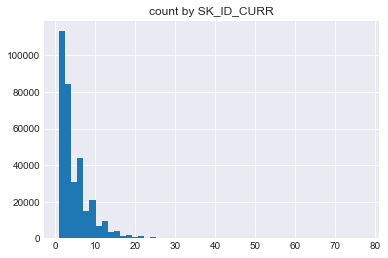

In [52]:
prev.groupby('SK_ID_CURR').SK_ID_PREV.count().hist(bins=50)
plt.title('count by SK_ID_CURR')
plt.show()

## missing

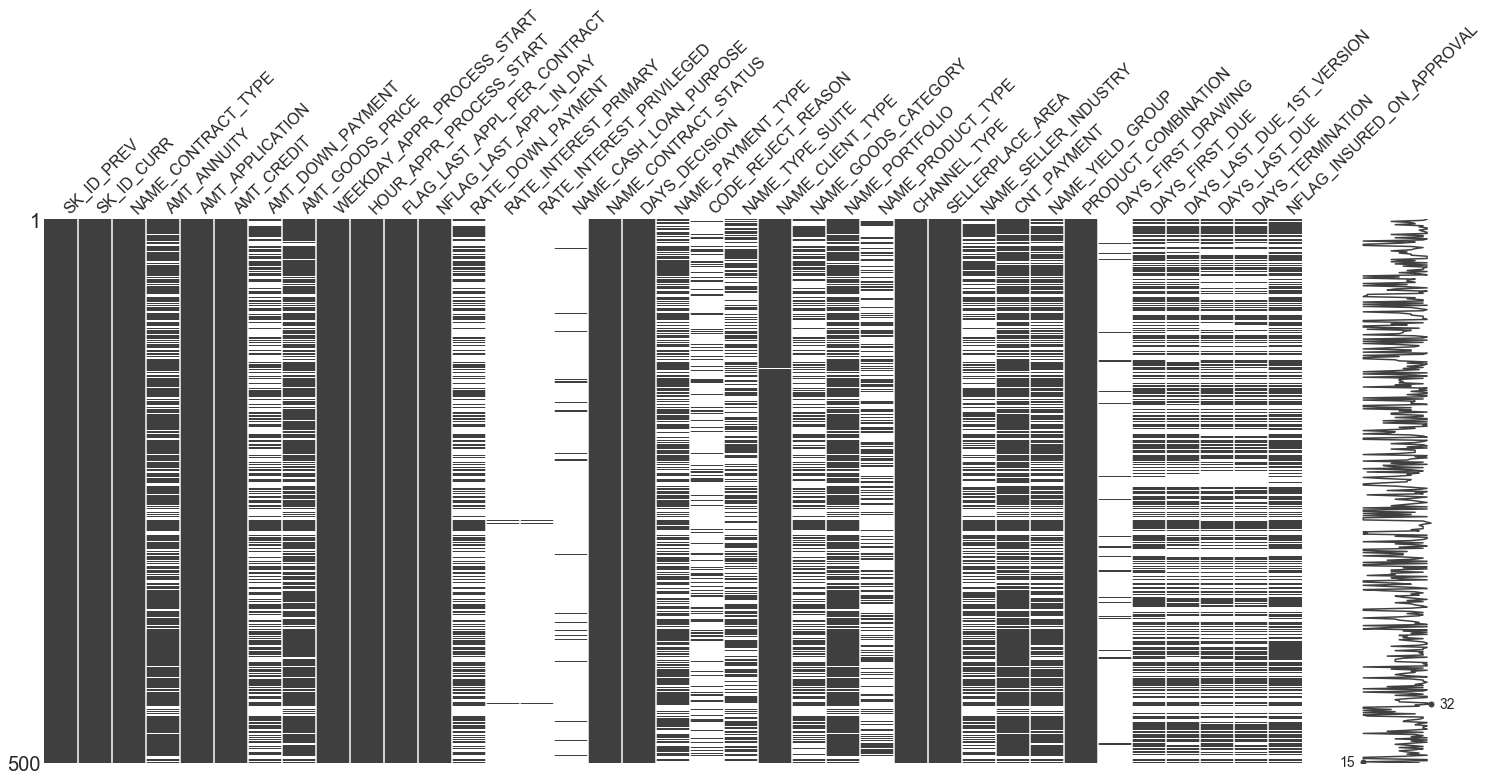

In [88]:
msno.matrix(prev.sample(500))
plt.show()

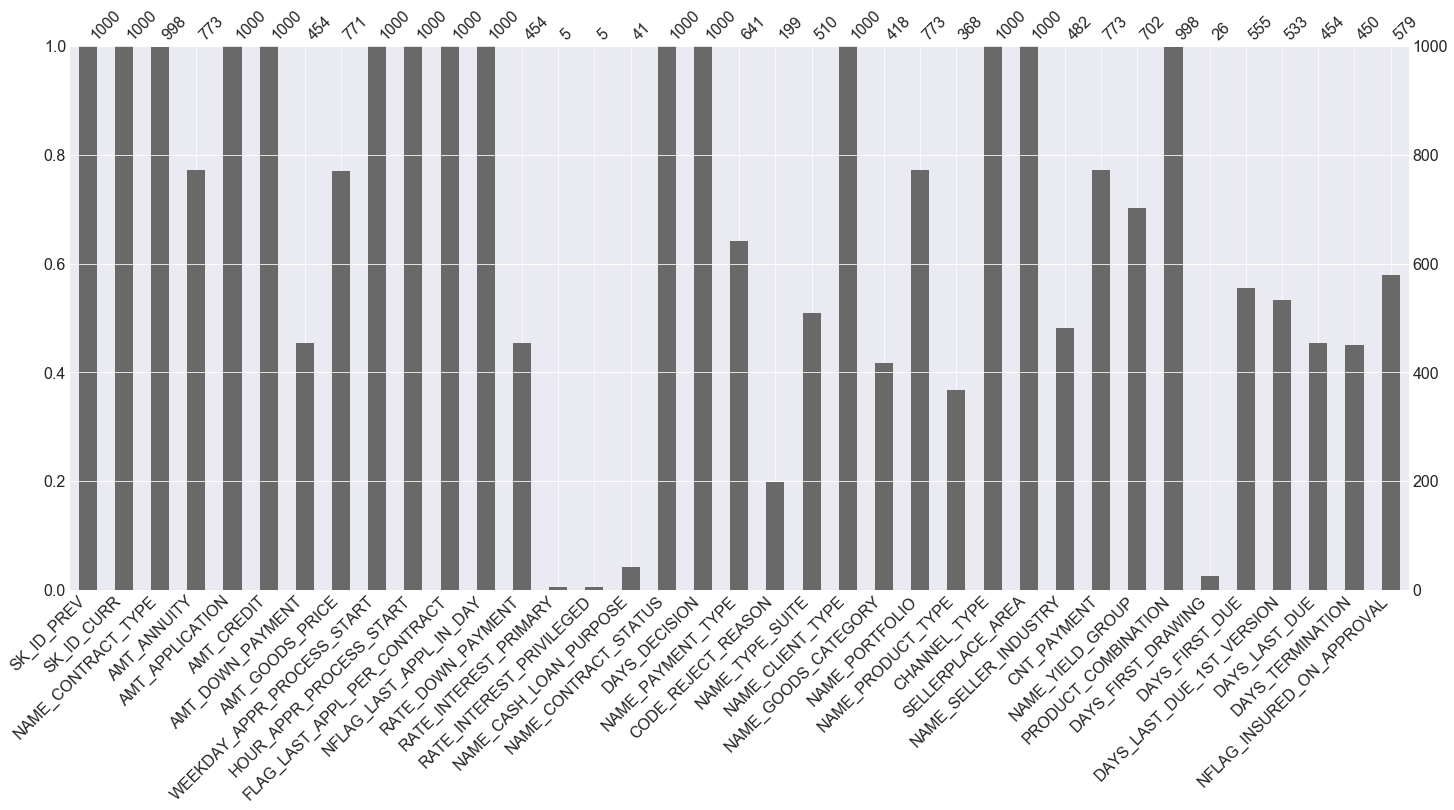

In [89]:
msno.bar(prev.sample(1000))

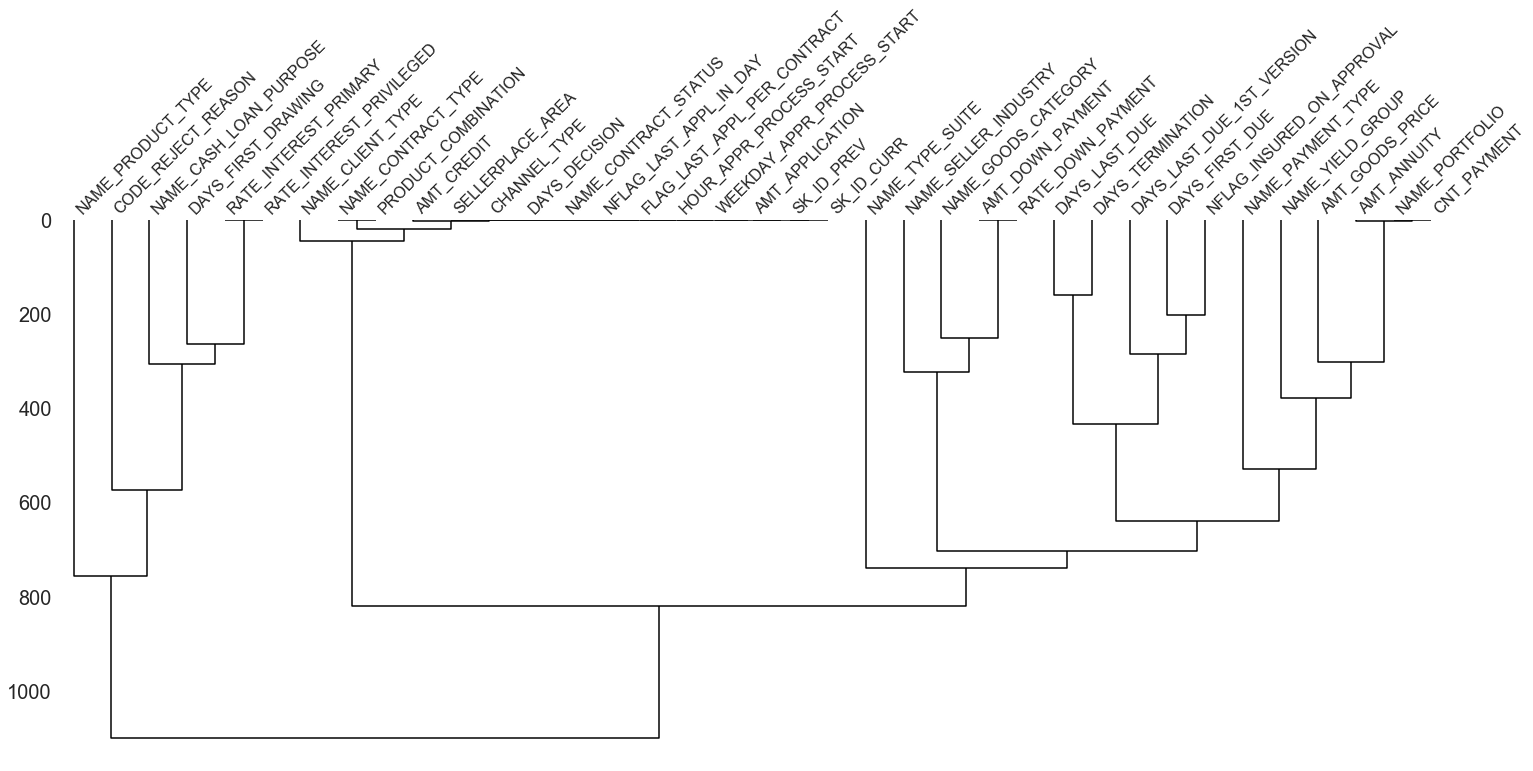

In [24]:
msno.dendrogram(prev)

## NAME_CONTRACT_TYPE

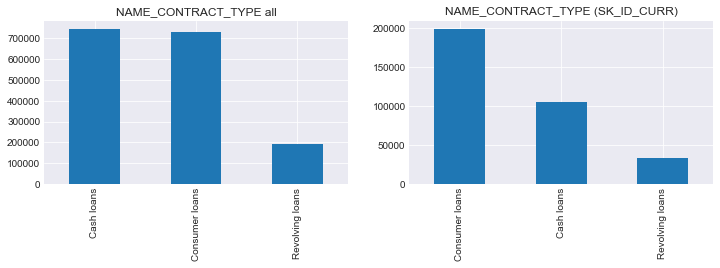

In [31]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 3))
prev.NAME_CONTRACT_TYPE.value_counts().plot.bar(ax=axes[0])
axes[0].set_title('NAME_CONTRACT_TYPE all')
prev.groupby('SK_ID_CURR').NAME_CONTRACT_TYPE.head(1).value_counts().plot.bar(ax=axes[1])
axes[1].set_title('NAME_CONTRACT_TYPE (SK_ID_CURR)')
plt.show()

## AMT_XX

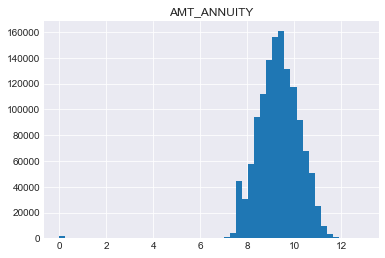

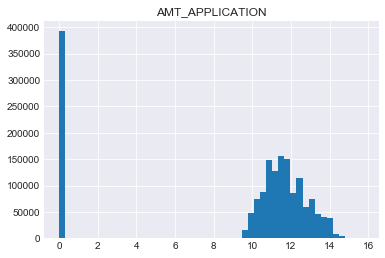

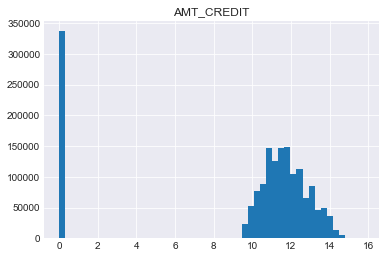

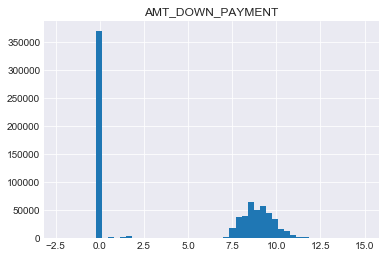

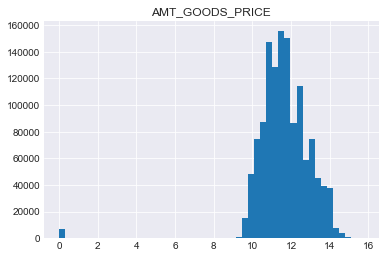

In [36]:
amt_cols = prev.filter(regex='AMT_').columns
for f in amt_cols:
    np.log1p(prev[f]).hist(bins=50)
    plt.title(f)
    plt.show()

## APPR_PROCESS

,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START
0,SATURDAY,15
1,THURSDAY,11
2,TUESDAY,11
3,MONDAY,7
4,THURSDAY,9


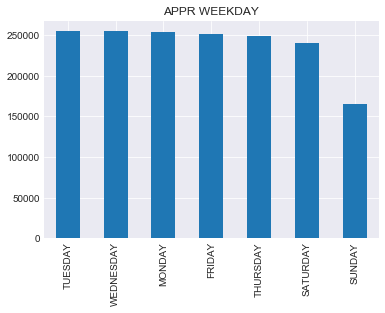

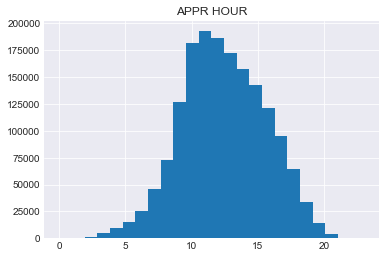

In [46]:
display(prev.filter(regex='_APPR_PROCESS_').head())
prev.WEEKDAY_APPR_PROCESS_START.value_counts().plot.bar()
plt.title('APPR WEEKDAY')
plt.show()
prev.HOUR_APPR_PROCESS_START.hist(bins=24)
plt.title('APPR HOUR')
plt.show()

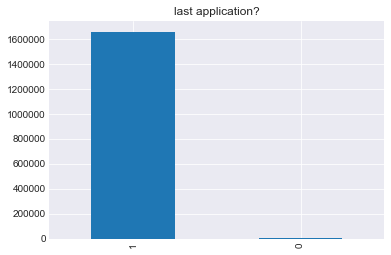

In [57]:
prev.FLAG_LAST_APPL_PER_CONTRACT.value_counts().plot.bar()
plt.title('last application?')
plt.show()

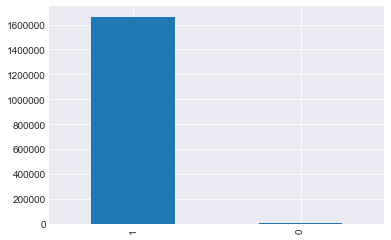

In [59]:
prev.NFLAG_LAST_APPL_IN_DAY.value_counts().plot.bar()

## RATE

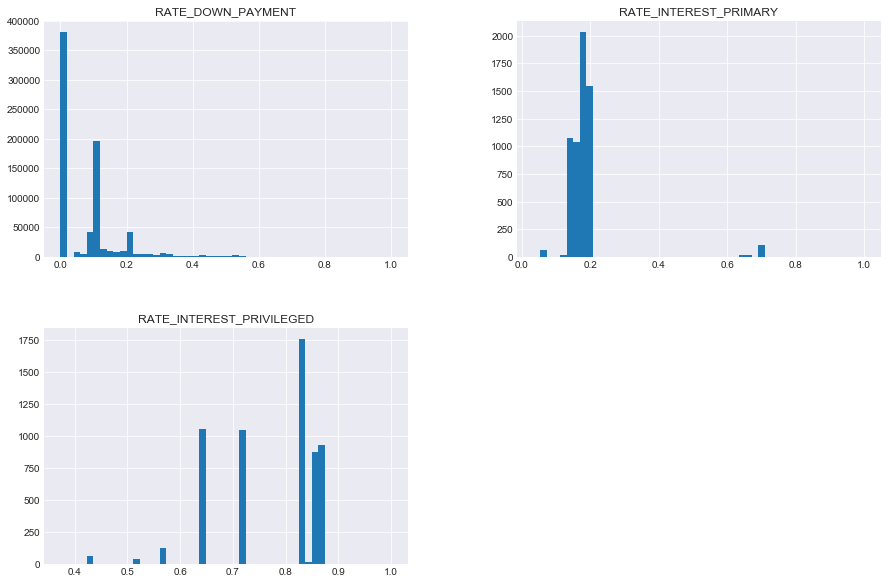

In [84]:
prev.filter(regex='RATE_').hist(bins=50, figsize=(15, 10))
plt.show()

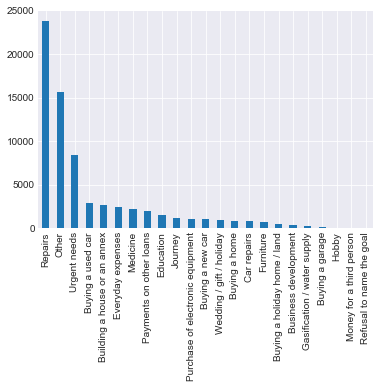

In [87]:
prev.NAME_CASH_LOAN_PURPOSE.value_counts().plot.bar()

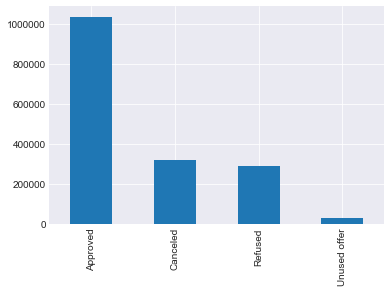

In [101]:
prev.NAME_CONTRACT_STATUS.value_counts().plot.bar()

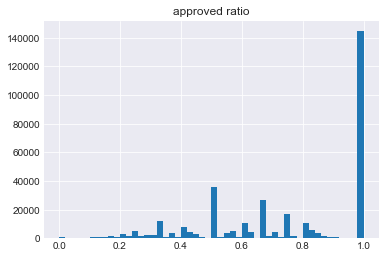

In [112]:
prev['is_approved'] = (prev.NAME_CONTRACT_STATUS == 'Approved').astype(int)
prev.groupby('SK_ID_CURR').is_approved.mean().hist(bins=50)
plt.title('approved ratio')
plt.show()

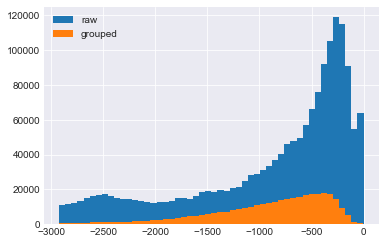

In [116]:
prev.DAYS_DECISION.hist(bins=50, label='raw')
prev.groupby('SK_ID_CURR').DAYS_DECISION.mean().hist(bins=50, label='grouped')
plt.legend()
plt.show()

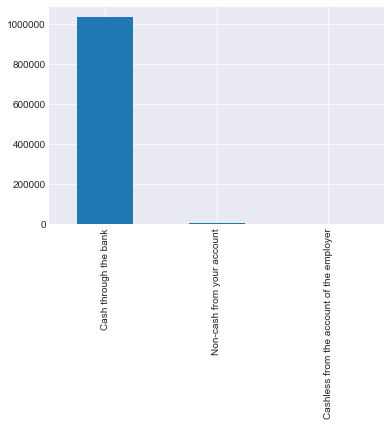

In [119]:
prev.NAME_PAYMENT_TYPE.value_counts().plot.bar()
plt.show()

In [98]:
prev.groupby('SK_ID_CURR').is_approved.mean().hist(bins=50)
plt.title('approved ratio')
plt.show()

prev.groupby('SK_ID_CURR').NAME_CASH_LOAN_PURPOSE

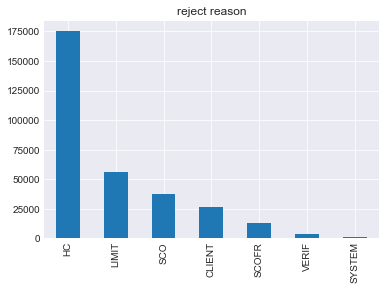

In [124]:
prev.CODE_REJECT_REASON.value_counts().plot.bar()
plt.title('reject reason')
plt.show()

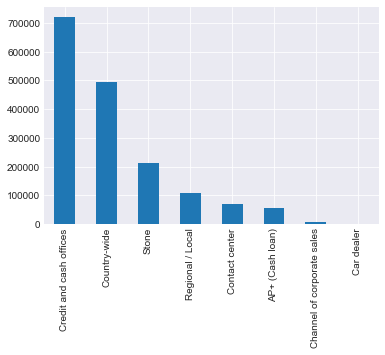

In [127]:
prev.CHANNEL_TYPE.value_counts().plot.bar()

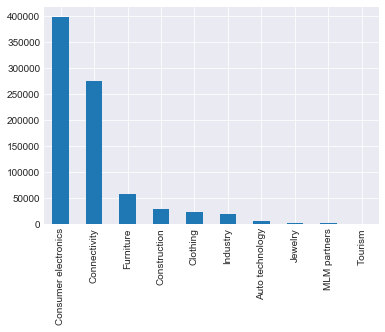

In [135]:
prev.NAME_SELLER_INDUSTRY.value_counts().plot.bar()

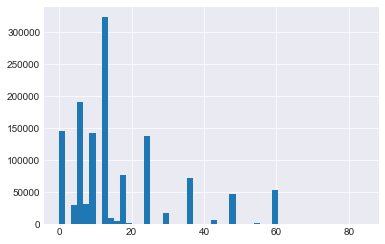

In [139]:
prev.CNT_PAYMENT.hist(bins=50)
plt.show()

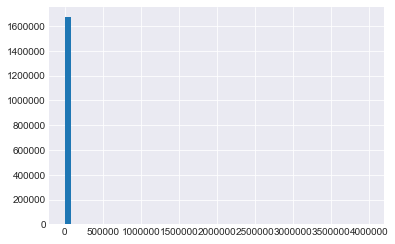

In [129]:
prev.SELLERPLACE_AREA.hist(bins=50)

In [141]:
prev.NAME_YIELD_GROUP.value_counts()

middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

In [145]:
prev.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

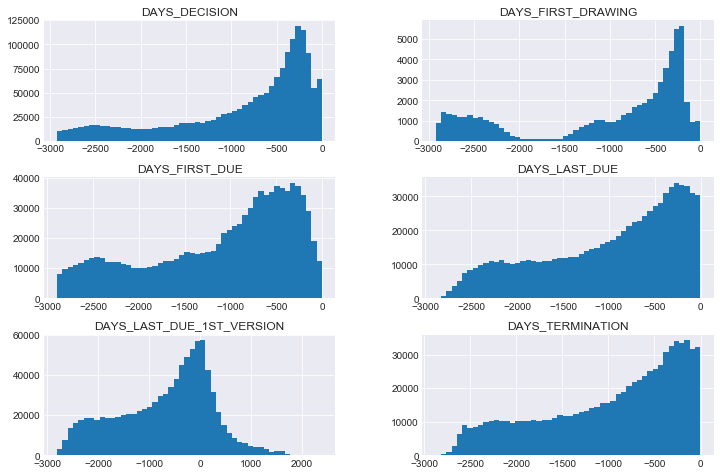

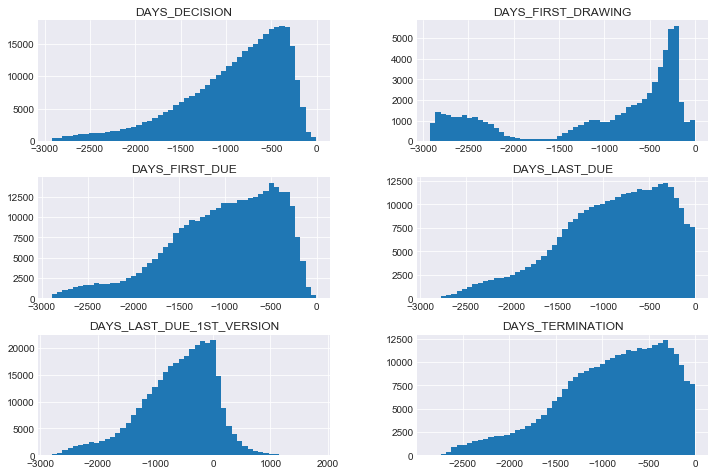

In [159]:
prev.filter(regex='DAYS_').hist(bins=50, figsize=(12, 8))
prev.groupby('SK_ID_CURR').mean().filter(regex='DAYS_').hist(bins=50, figsize=(12, 8))
plt.show()

In [161]:
prev.NFLAG_INSURED_ON_APPROVAL.value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [ ]:
prev.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x187d065c0>,
      dtype=object)

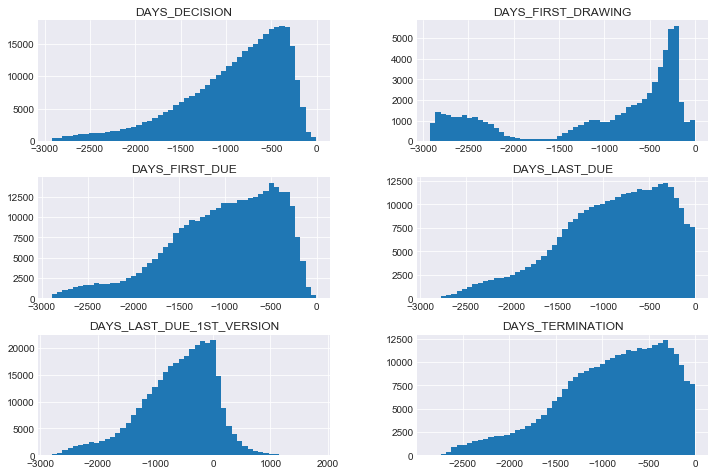

In [151]:
prev.groupby('SK_ID_CURR').mean().filter(regex='DAYS_').hist(bins=50, figsize=(12, 8))

# installments

In [162]:
inst = pd.read_feather('../input/installments_payments.ftr')
inst.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


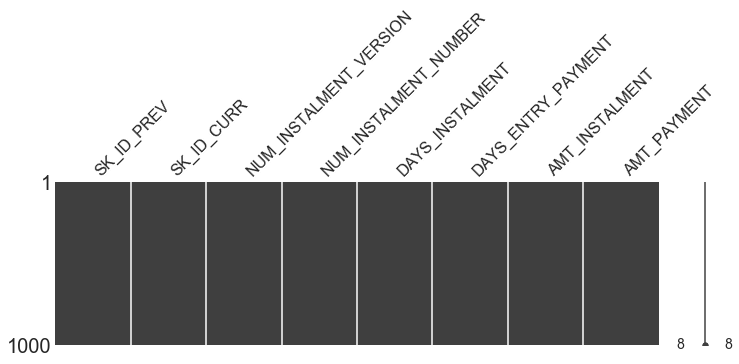

In [173]:
msno.matrix(inst.sample(1000), figsize=(12, 3))
plt.show()

In [254]:
inst.groupby('SK_ID_CURR').max()

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_CURR,,,,,,,
100001,1851984,2.0,4,-1619.0,-1628.0,17397.900,17397.900
100002,1038818,2.0,19,-25.0,-49.0,53093.745,53093.745
100003,2636178,2.0,12,-536.0,-544.0,560835.360,560835.360
100004,1564014,2.0,3,-724.0,-727.0,10573.965,10573.965
100005,2495675,2.0,9,-466.0,-470.0,17656.245,17656.245
100006,2299329,2.0,10,-11.0,-12.0,691786.890,691786.890
100007,2462742,2.0,17,-14.0,-14.0,22678.785,22678.785
100008,2613879,2.0,10,-69.0,-82.0,432218.295,432218.295
100009,2797899,1.0,12,-43.0,-58.0,17341.605,17341.605


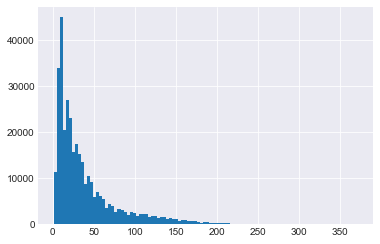

In [177]:
inst.groupby('SK_ID_CURR').SK_ID_PREV.count().hist(bins=100)
plt.show()

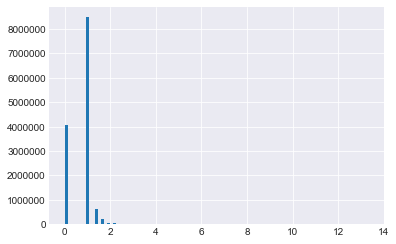

In [200]:
np.sqrt(inst.NUM_INSTALMENT_VERSION).hist(bins=100)

In [245]:
inst.groupby('SK_ID_CURR').mean()

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_CURR,,,,,,,
100001,1.576389e+06,1.142857,2.714286,-2187.714286,-2195.000000,5885.132143,5885.132143
100002,1.038818e+06,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
100003,2.290070e+06,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000
100004,1.564014e+06,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
100005,2.495675e+06,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000
100006,2.217428e+06,1.125000,4.437500,-252.250000,-271.625000,62947.088438,62947.088438
100007,2.048985e+06,1.166667,7.045455,-1028.606061,-1032.242424,12666.444545,12214.060227
100008,2.034127e+06,1.028571,5.057143,-1263.914286,-1237.800000,27702.964286,27360.502714
100009,1.635566e+06,1.000000,4.549020,-855.823529,-864.411765,9568.531765,9568.531765


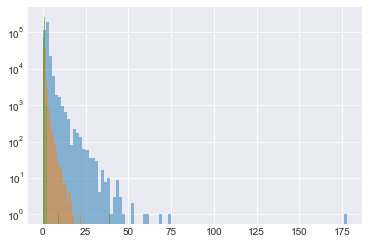

In [203]:
inst.groupby('SK_ID_CURR').NUM_INSTALMENT_VERSION.max().hist(bins=100, alpha=.5, log=True)
inst.groupby('SK_ID_CURR').NUM_INSTALMENT_VERSION.mean().hist(bins=100, alpha=.5, log=True)
inst.groupby('SK_ID_CURR').NUM_INSTALMENT_VERSION.min().hist(bins=100, alpha=.5, log=True)

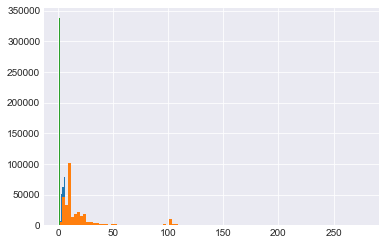

In [186]:
inst.groupby('SK_ID_CURR').NUM_INSTALMENT_NUMBER.mean().hist(bins=100)
inst.groupby('SK_ID_CURR').NUM_INSTALMENT_NUMBER.max().hist(bins=100)
inst.groupby('SK_ID_CURR').NUM_INSTALMENT_NUMBER.min().hist(bins=100)

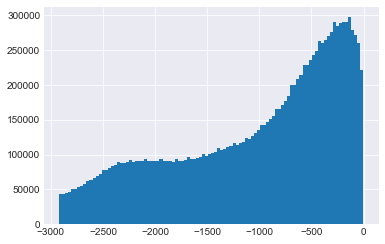

In [188]:
inst.DAYS_INSTALMENT.hist(bins=100)

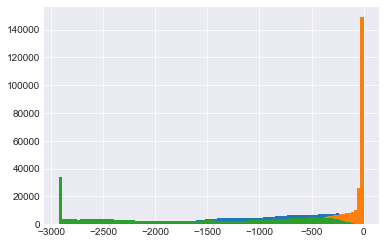

In [190]:
inst.groupby('SK_ID_CURR').DAYS_INSTALMENT.mean().hist(bins=100)
inst.groupby('SK_ID_CURR').DAYS_INSTALMENT.max().hist(bins=100)
inst.groupby('SK_ID_CURR').DAYS_INSTALMENT.min().hist(bins=100)

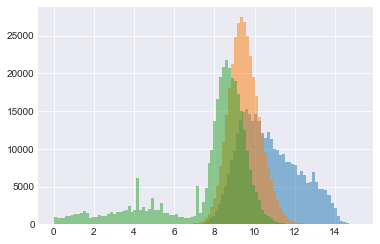

In [197]:
np.log1p(inst.groupby('SK_ID_CURR').AMT_INSTALMENT.max()).hist(bins=100, alpha=.5)
np.log1p(inst.groupby('SK_ID_CURR').AMT_INSTALMENT.mean()).hist(bins=100, alpha=.5)
np.log1p(inst.groupby('SK_ID_CURR').AMT_INSTALMENT.min()).hist(bins=100, alpha=.5)

In [212]:
def hist_groupby(df, cols, func=None):
    if not type(cols)==list:
        cols = [cols]
    for f in cols:        
        if func:
            func(df.groupby('SK_ID_CURR')[f].max()).hist(bins=100, alpha=.5)
            func(df.groupby('SK_ID_CURR')[f].mean()).hist(bins=100, alpha=.5)
            func(df.groupby('SK_ID_CURR')[f].min()).hist(bins=100, alpha=.5)
        else:

            df.groupby('SK_ID_CURR')[f].max().hist(bins=100, alpha=.5)
            df.groupby('SK_ID_CURR')[f].mean().hist(bins=100, alpha=.5)
            df.groupby('SK_ID_CURR')[f].min().hist(bins=100, alpha=.5)
        plt.title(f)
        plt.show()

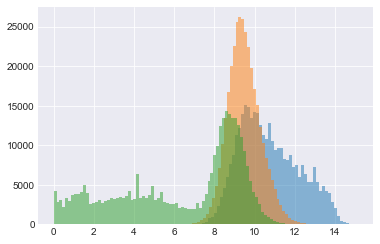

In [198]:
np.log1p(inst.groupby('SK_ID_CURR').AMT_PAYMENT.max()).hist(bins=100, alpha=.5)
np.log1p(inst.groupby('SK_ID_CURR').AMT_PAYMENT.mean()).hist(bins=100, alpha=.5)
np.log1p(inst.groupby('SK_ID_CURR').AMT_PAYMENT.min()).hist(bins=100, alpha=.5)

# POS CASH

In [199]:
pos = pd.read_feather('../input/POS_CASH_balance.ftr')
pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


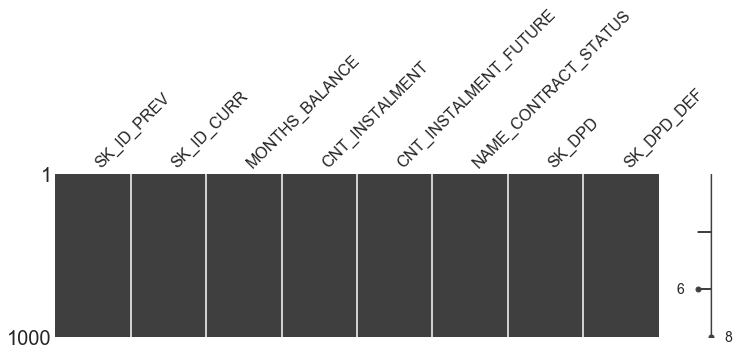

In [223]:
msno.matrix(pos.sample(1000), figsize=(12, 3))
plt.show()

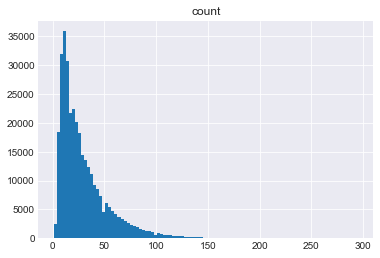

In [207]:
pos.groupby('SK_ID_CURR').SK_ID_PREV.count().hist(bins=100)
plt.title('count')
plt.show()

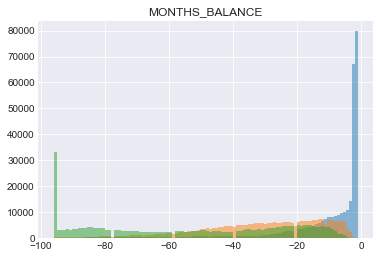

In [213]:
hist_groupby(pos, 'MONTHS_BALANCE')

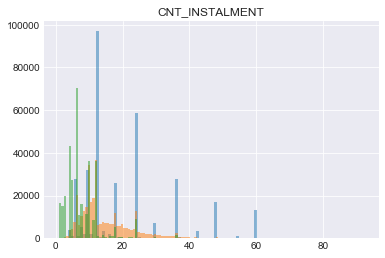

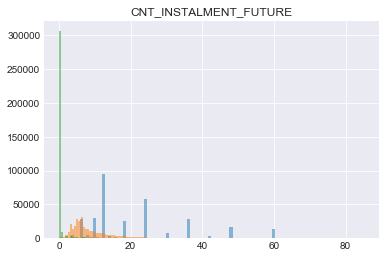

In [215]:
hist_groupby(pos, ['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE'])

In [ ]:
pos.groupby('SK_ID_CURR').max()

In [ ]:
pos.shape

In [218]:
pos.groupby('SK_ID_CURR').NAME_CONTRACT_STATUS.head(1).value_counts()

Active                   307436
Completed                 26255
Signed                     3131
Returned to the store       223
Approved                    182
Demand                       24
Canceled                      1
Name: NAME_CONTRACT_STATUS, dtype: int64

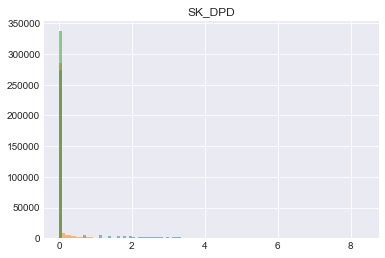

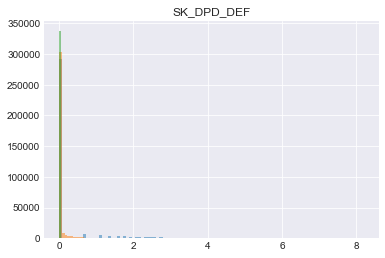

In [221]:
hist_groupby(pos, ['SK_DPD', 'SK_DPD_DEF'], np.log1p)

# CREDIT_BALANCE

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


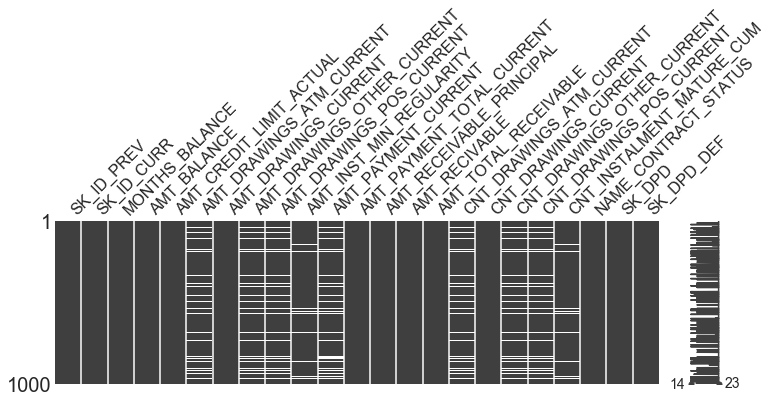

In [224]:
card = pd.read_feather('../input/credit_card_balance.ftr')
display(card.head())
msno.matrix(card.sample(1000), figsize=(12, 3))

/Users/amane/.pyenv/versions/3.6.1/envs/compe/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log1p
  import sys
/Users/amane/.pyenv/versions/3.6.1/envs/compe/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log1p
  


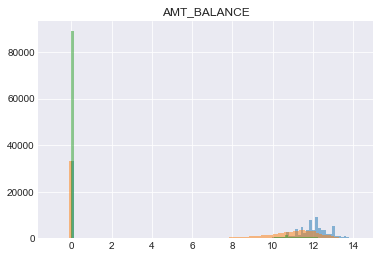

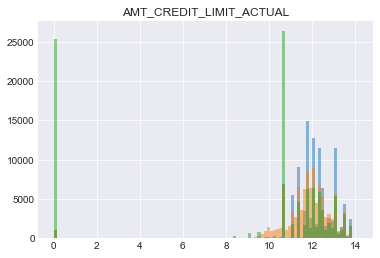

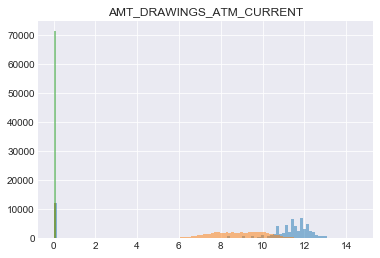

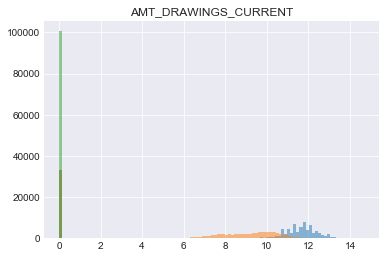

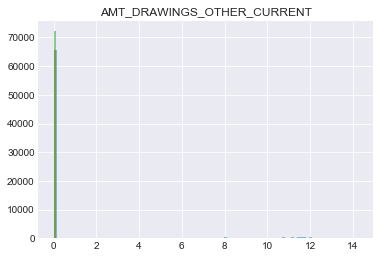

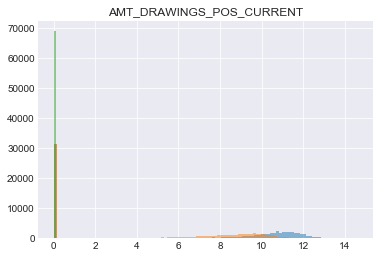

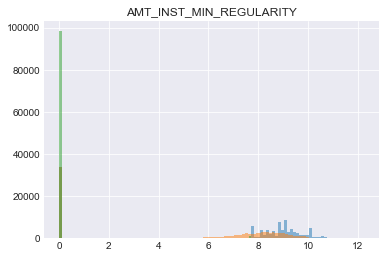

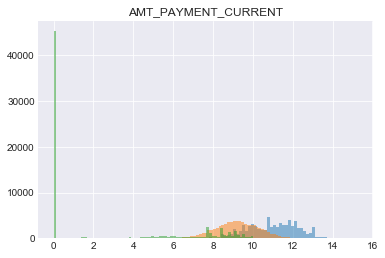

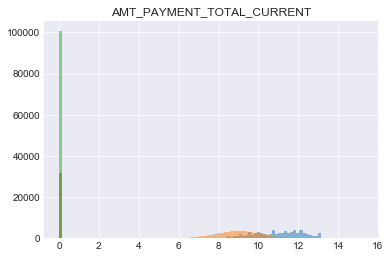

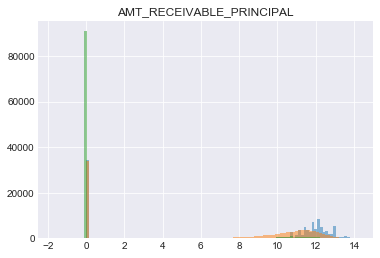

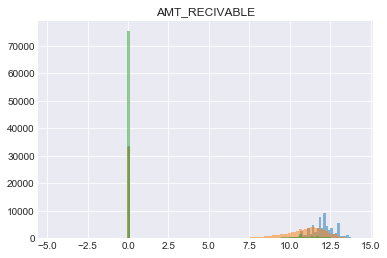

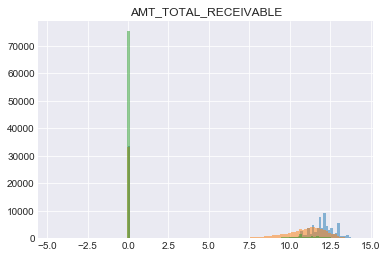

In [227]:
hist_groupby(card, card.filter(regex='AMT_').columns.tolist(), np.log1p)

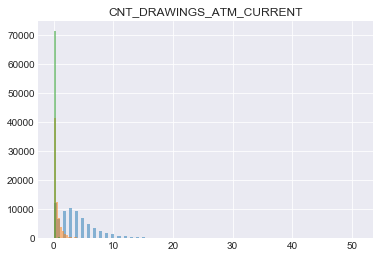

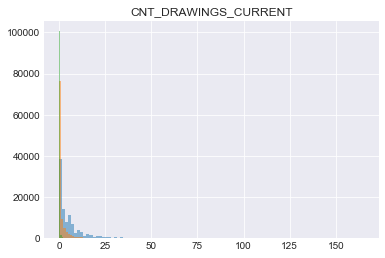

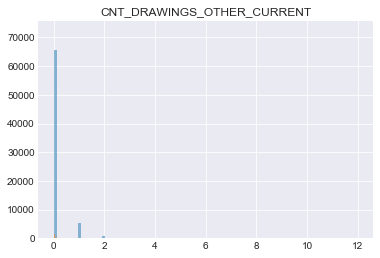

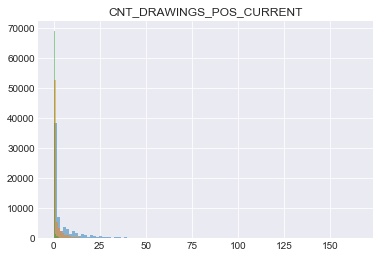

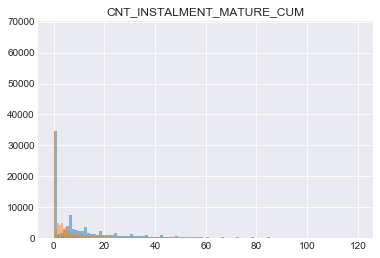

In [228]:
hist_groupby(card, card.filter(regex='CNT_').columns.tolist())

In [230]:
card.groupby('SK_ID_CURR').NAME_CONTRACT_STATUS.head(1).value_counts()

Active           98773
Completed         4360
Signed             407
Demand              10
Sent proposal        8
Name: NAME_CONTRACT_STATUS, dtype: int64

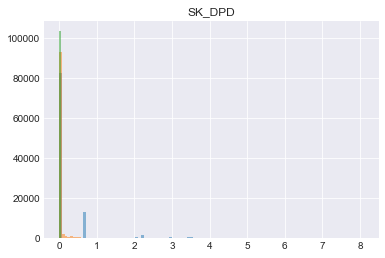

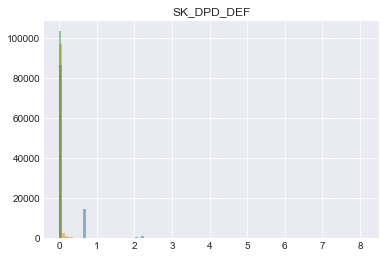

In [231]:
hist_groupby(card, ['SK_DPD', 'SK_DPD_DEF'], np.log1p)